# Proyecto de programación: El indice de marginalización de México

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px

In [2]:
# !pip install openpyxl
# !pip install xlrd

### a. Descargar y Leer el archivo de Base de Datos por Municipio 2020 del índice de marginación desde la página de descargas del gobierno federal mexicano en un dataframe. Los datos se encuentran en la pestaña "IMM 2020".

In [91]:
df = pd.read_excel('http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls',sheet_name='IMM_2020')  

In [92]:
df.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


### b. Mostrar la descripción del DataFrame (medias, máximos mínimos, etc...) mostrar algunos hallazgos interesantes de la simple inspección visual y por estadísticas básicas de los datos.

In [93]:
df.describe()

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19.215472,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,7.367340,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,1.000000,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,14.000000,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,20.000000,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,24.000000,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,32.000000,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


En el análisis del DataFrame podemos observar las siguientes características mas relevantes de acuerdo a los datos:
- El número de municipios en el estudio es de 2,469.
- La media indica que, en promedio, los municipios tienen una población total de alrededor de 51,038 habitantes. El porcentaje promedio de personas analfabetas es del 10.16%, y el promedio de municipios con acceso a servicios básicos es del 45.85%.
- La desviación estándar muestra la variabilidad de los datos. Por ejemplo, la desviación estándar de la población total es de aproximadamente 146,990 habitantes, lo que indica una amplia gama de tamaños de municipios.
- Los valores mínimos revelan que algunos municipios tienen poblaciones muy pequeñas, con menos de 100 habitantes. Además, se observan niveles bajos de analfabetismo y acceso a servicios básicos.
- Los valores máximos indican la presencia de municipios con poblaciones muy grandes, llegando a más de 1,922,523 habitantes. También se encuentran municipios con niveles altos de analfabetismo y falta de acceso a servicios básicos.
Estas estadísticas brindan una visión general de las características del índice de marginación en los municipios de México, permitiendo identificar patrones y tendencias en los datos.

### c. Realizar una gráfica que permita ver el porcentaje de municipios por estado con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en archivo png

In [136]:
distribucion_df = df.groupby(['NOM_ENT','GM_2020'])[['NOM_MUN']].count().reset_index()
group_totals = distribucion_df.groupby('NOM_ENT')['NOM_MUN'].transform('sum')

In [137]:
distribucion_df['Porcentaje'] = (distribucion_df['NOM_MUN'] / group_totals) * 100
distribucion_df = distribucion_df.rename(columns={'NOM_ENT':'Estado', 'GM_2020': 'Grado de marginación', 'NOM_MUN':'Municipios'})
distribucion_df.head()

,Estado,Grado de marginación,Municipios,Porcentaje
0,Aguascalientes,Muy bajo,11,100.000000
1,Baja California,Medio,1,16.666667
2,Baja California,Muy bajo,5,83.333333
3,Baja California Sur,Muy bajo,5,100.000000
4,Campeche,Alto,2,16.666667


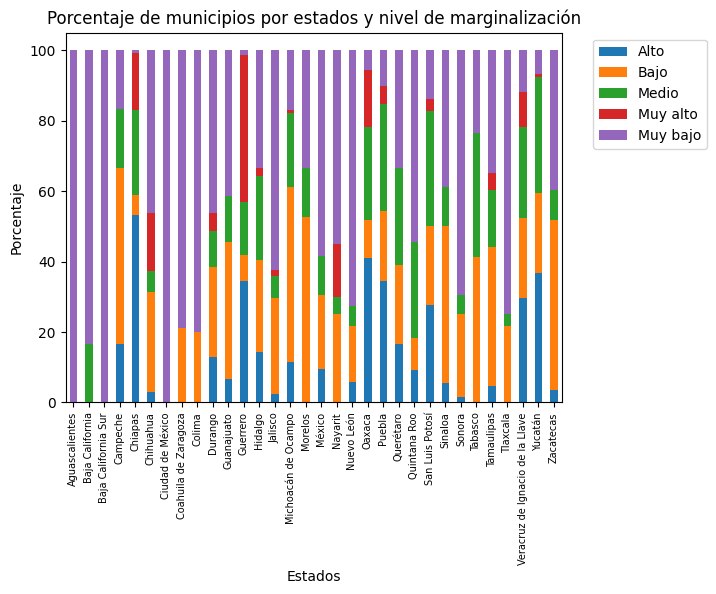

In [143]:
grouped = distribucion_df.groupby(['Estado', 'Grado de marginación'])['Porcentaje'].sum().unstack()

grouped.plot(kind='bar', stacked=True)

plt.title('Porcentaje de municipios por estados y nivel de marginalización')
plt.xlabel('Estados')
plt.ylabel('Porcentaje')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=7) 
plt.savefig('MarginalizacionMunicipios.png', bbox_inches='tight')
plt.show()

### d. Realizar una gráfica que muestre el porcentaje de la población, respecto a la población total de cada estado, con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en formato jpg

In [128]:
distribucion_poblacion_df = df.groupby(['NOM_ENT','GM_2020'])[['POB_TOT']].sum().reset_index()
total_por_estado = distribucion_poblacion_df.groupby('NOM_ENT')['POB_TOT'].transform('sum')
distribucion_poblacion_df['Porcentaje'] = (distribucion_poblacion_df['POB_TOT'] / total_por_estado) * 100
distribucion_poblacion_df = distribucion_poblacion_df.rename(columns={'NOM_ENT':'Estado', 'GM_2020': 'Grado de marginación', 'POB_TOT':'Población'})
distribucion_poblacion_df.head()

,Estado,Grado de marginación,Población,Porcentaje
0,Aguascalientes,Muy bajo,1425607,100.000000
1,Baja California,Medio,117568,3.119325
2,Baja California,Muy bajo,3651452,96.880675
3,Baja California Sur,Muy bajo,798447,100.000000
4,Campeche,Alto,78627,8.469424


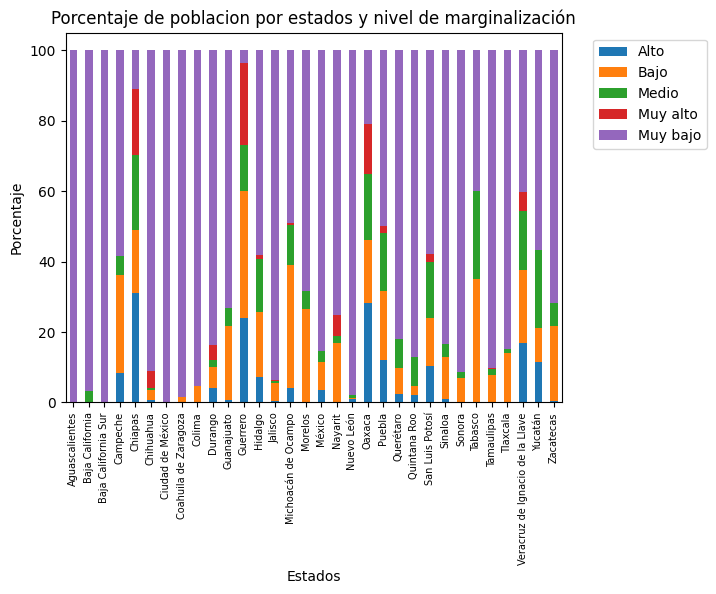

In [129]:
grouped = distribucion_poblacion_df.groupby(['Estado', 'Grado de marginación'])['Porcentaje'].sum().unstack()

grouped.plot(kind='bar', stacked=True)

plt.title('Porcentaje de poblacion por estados y nivel de marginalización')
plt.xlabel('Estados')
plt.ylabel('Porcentaje')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=7) 
plt.savefig('MarginalizacionPoblacion.png', bbox_inches='tight')
plt.show()

In [131]:
plt.savefig('MarginalizacionPoblacion.png')

<Figure size 640x480 with 0 Axes>

### e. ¿Hay coincidencias entra la gráficas anteriores?  ¿Algún hallazgo? Comenta tu análisis.

In [ ]:
# Creamos el dataframe con la información agrupada que se requiere para las gráficas
distribucion_poblacion_df = marginacion_df.groupby(['NOM_ENT','GM_2020'])[['POB_TOT']].sum().reset_index()

# Calculamos el total de población por estado
total_por_estado = distribucion_poblacion_df.groupby('NOM_ENT')['POB_TOT'].transform('sum')

# Calculamos el porcentaje relativo de la distribución de la población
distribucion_poblacion_df['Porcentaje'] = (distribucion_poblacion_df['POB_TOT'] / total_por_estado) * 100

# Renombramos las columnas
distribucion_poblacion_df = distribucion_poblacion_df.rename(columns={'NOM_ENT':'Estado', 'GM_2020': 'Grado de marginación', 'POB_TOT':'Población'})
distribucion_poblacion_df.head()

### f. Grafica la relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones en localidades de menos de 5,000 habitantes.

NameError: name 'sns' is not defined

### g. ¿Existe una relación? ¿Cómo podrías analizar con que variable tiene mas corelación el porcentaje de analfabetismo en personas mayores de 15 años?

### h. Desarrolla un nuevo DataFrame con indicadores interesantes por estado que se obtengan de los datos a nivel municipal y que pudieran ser de importancia a la hora de definir políticas públicas. Se va a calificar la originalidad de los indicadores. Justifica las decisiones que tomes, y guarda el nuevo dataframe en formato parquet.